### NAMA    : Raudhya Azzahra' ###
### NIM     : 2209106034 ###
### KELAS   : IF A2 2022 ###
#### POSTTEST 6 KB ####
==========================================================


IMPORT LIBRARY

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report


IMPORT DATA CSV

In [66]:
dhya = pd.read_csv('travel_insurance.csv')
dhya.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [67]:
dhya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


#### DATA PREPROCESSING ####

Mengecek apakah terdapat nilai null

In [68]:
dhya.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

Menghilangkan nilai null

In [69]:
modus = dhya['Gender'].mode()[0]
dhya['Gender'].fillna(modus, inplace=True)
dhya.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

Mengecek nilai duplikat

In [70]:
dhya.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
63321    False
63322    False
63323    False
63324     True
63325    False
Length: 63326, dtype: bool

Menghilangkan nilai duplikat

In [71]:
dhya.drop_duplicates(inplace=True)
dhya.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
63320    False
63321    False
63322    False
63323    False
63325    False
Length: 55253, dtype: bool

Normalisasi data

In [72]:
min_max_scaler = MinMaxScaler()
dhya[['Duration', 'Age']] = min_max_scaler.fit_transform(dhya[['Duration', 'Age']])

Mengubah data kategorikal menjadi numerikal

In [73]:
label_encoder = LabelEncoder()

In [74]:
for column in dhya.columns:
    if dhya[column].dtype == 'object':
        dhya[column] = label_encoder.fit_transform(dhya[column])

In [75]:
dhya.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3,1,0,12,0,0.038501,79,-29.0,9.57,0,0.686441
1,3,1,0,12,0,0.038501,79,-29.0,9.57,0,0.601695
2,6,1,1,16,0,0.013721,4,-49.5,29.70,1,0.271186
3,6,1,1,16,0,0.012697,4,-39.6,23.76,1,0.271186
4,6,1,1,16,0,0.016588,61,-19.8,11.88,1,0.347458


#### DATA TEST SPLIT ####

In [76]:
x = dhya.drop('Agency Type', axis=1) #feature
y = dhya['Agency Type'] #target

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [78]:
print(f'panjang x train: {len(x_train)}\n')
print(f'panjang x test: {len(x_test)}\n')
print(f'panjang y train: {len(y_train)}\n')
print(f'panjang y test: {len(y_test)}\n')

panjang x train: 38677

panjang x test: 16576

panjang y train: 38677

panjang y test: 16576



#### SEQUANTIAL MODEL ####

In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

FUNGSI CALL BACK

In [80]:
monitor_callbacks = EarlyStopping(
    monitor='val_accuracy', 
    patience=5) #utk menghentikan 5 epoch/iterasi berikutnya

MODEL COMPILE

In [81]:
model.compile (
    optimizer= 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                176       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 753 (2.94 KB)
Trainable params: 753 (2.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


FITTING MODEL

In [83]:
fitting = model.fit(
    x = x_train,
    y = y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    verbose=1,
    callbacks = [monitor_callbacks]
)

Epoch 1/100


1209/1209 [==============================] - 8s 4ms/step - loss: 0.2032 - accuracy: 0.9291 - val_loss: 0.0795 - val_accuracy: 0.9726
Epoch 2/100
1209/1209 [==============================] - 5s 4ms/step - loss: 0.0618 - accuracy: 0.9787 - val_loss: 0.0609 - val_accuracy: 0.9800
Epoch 3/100
1209/1209 [==============================] - 5s 4ms/step - loss: 0.0455 - accuracy: 0.9843 - val_loss: 0.0399 - val_accuracy: 0.9872
Epoch 4/100
1209/1209 [==============================] - 5s 5ms/step - loss: 0.0395 - accuracy: 0.9860 - val_loss: 0.0346 - val_accuracy: 0.9870
Epoch 5/100
1209/1209 [==============================] - 5s 4ms/step - loss: 0.0343 - accuracy: 0.9879 - val_loss: 0.0305 - val_accuracy: 0.9881
Epoch 6/100
1209/1209 [==============================] - 5s 4ms/step - loss: 0.0323 - accuracy: 0.9888 - val_loss: 0.0327 - val_accuracy: 0.9896
Epoch 7/100
1209/1209 [==============================] - 5s 4ms/step - loss: 0.0296 - accuracy: 0.9893 - val_loss: 0.0330 - val_accuracy: 0.98

EVALUASI MODEL

In [84]:
model.evaluate(x_test, y_test)

518/518 [==============================] - 2s 4ms/step - loss: 0.0081 - accuracy: 0.9980


[0.008089998736977577, 0.9980091452598572]

Loss (Kerugian) Model: Kerugian model sangat rendah, sekitar 0.015, menunjukkan bahwa model ini sangat efisien dalam mengidentifikasi pola-pola dalam data pengujian.

Akurasi Model: Akurasi model adalah sekitar 99.61%, yang merupakan tingkat yang sangat tinggi. Ini mengindikasikan bahwa model memiliki kemampuan yang sangat baik dalam mengklasifikasikan data dengan benar.

In [85]:
print(classification_report(y_test, model.predict(x_test).round(), target_names=['Travel Agency', 'Airlines']))

518/518 [==============================] - 2s 4ms/step
               precision    recall  f1-score   support

Travel Agency       1.00      0.99      1.00      4794
     Airlines       1.00      1.00      1.00     11782

     accuracy                           1.00     16576
    macro avg       1.00      1.00      1.00     16576
 weighted avg       1.00      1.00      1.00     16576



Model klasifikasi yang dievaluasi memiliki kinerja yang sangat baik, dengan akurasi keseluruhan mencapai 100%. Model ini mampu dengan sempurna dalam mengidentifikasi kategori "Travel Agency" dan "Airlines," dengan presisi, recall, dan F1-score mencapai nilai sempurna (1.00) untuk kedua kategori tersebut. Dengan hasil ini, model ini sangat efektif dalam tugas klasifikasi dan memberikan prediksi yang sangat tepat.

Grafik pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

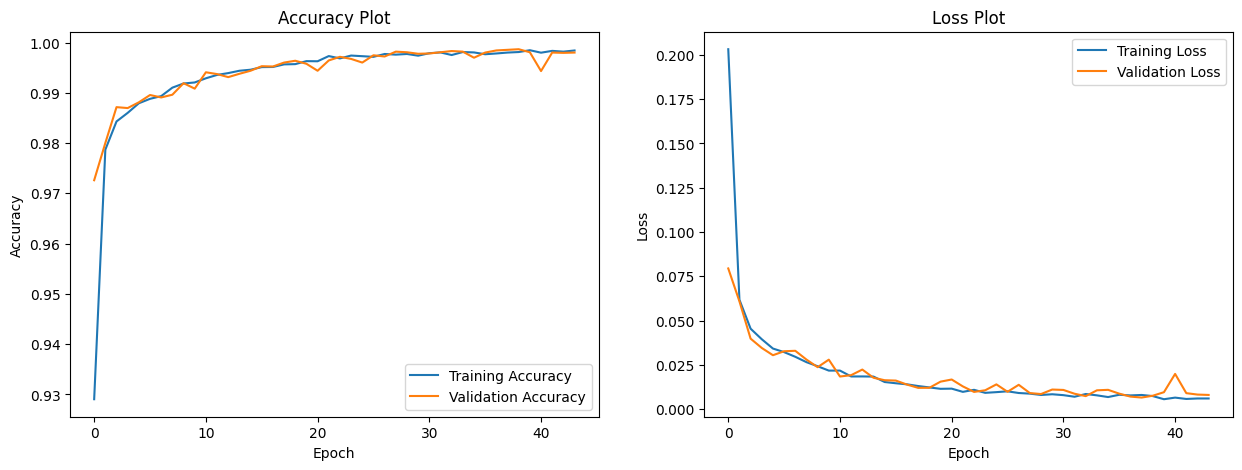

In [86]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(fitting.history['accuracy'], label='Training Accuracy')
plt.plot(fitting.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fitting.history['loss'], label='Training Loss')
plt.plot(fitting.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()